In [1]:
%pip install newsapi-python

  Obtaining dependency information for newsapi-python from https://files.pythonhosted.org/packages/74/47/e3b099102f0c826d37841d2266e19f1568dcf58ba86e4c6948e2a124f91d/newsapi_python-0.2.7-py2.py3-none-any.whl.metadata


In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -------- ------------------------------- 0.6/3.0 MB 13.5 MB/s eta 0:00:01
     ---------------------- ----------------- 1.6/3.0 MB 21.0 MB/s eta 0:00:01
     ---------------------- ----------------- 1.6/3.0 MB 21.0 MB/s eta 0:00:01
     ---------------------- ----------------- 1.6/3.0 M

In [15]:
import nltk
### Uncomment it when the script runs for the first time 
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
from newsapi import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [17]:
pd.set_option('display.max_colwidth',1000)

In [18]:
# Init news api from newsapi.org
NEWS_API_KEY = '1c254fb31ef44218a94b4449782f62d7'


In [19]:
newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tata'
my_date = date.today() - timedelta(days=1) 
# datetime.strptime('10-Apr-2021','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)

In [20]:
articles

{'status': 'ok',
 'totalResults': 5,
 'articles': [{'source': {'id': 'the-times-of-india',
    'name': 'The Times of India'},
   'author': 'ET Bureau',
   'title': 'With DRHP, Hyundai steers towards $3 billion public listing',
   'description': "India's largest public issue will be an offer-for-sale (OFS) of up to 142.2 million shares, or a 17.5% stake, by South Korean parent Hyundai Motor Co.",
   'url': 'https://economictimes.indiatimes.com/markets/ipos/fpos/with-drhp-hyundai-steers-towards-3-billion-public-listing/articleshow/111031692.cms',
   'urlToImage': 'https://img.etimg.com/thumb/msid-111031779,width-1200,height-630,imgsize-5806,overlay-etmarkets/photo.jpg',
   'publishedAt': '2024-06-16T03:37:22Z',
   'content': "Mumbai: Hyundai Motor India (HMIL), the country's second-largest car maker, filed a draft red herring prospectus (DRHP) with the Securities and Exchange Board of India on Saturday for a record 25,000… [+2765 chars]"},
  {'source': {'id': None, 'name': 'Business Stan

In [21]:
PHRASES = ['Hyundai Motor India Ltd (HMIL) is planning a ₹25,000 crore IPO']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Hyundai Motor India Ltd (HMIL) is planning a ₹25,000 crore IPO
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [22]:

def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

   Sentiment  \
0      0.296   
1      0.745   

                                                                                                                                                                                    URL  \
0                                            https://economictimes.indiatimes.com/markets/ipos/fpos/with-drhp-hyundai-steers-towards-3-billion-public-listing/articleshow/111031692.cms   
1  https://economictimes.indiatimes.com/industry/auto/auto-news/boost-for-hyundai-motor-export-plans-as-auto-co-plans-to-launch-slew-of-evs-over-next-4-years/articleshow/111026895.cms   

                                                                                            Title  \
0                                     With DRHP, Hyundai steers towards $3 billion public listing   
1  Boost for Hyundai Motor export plans, as auto co plans to launch slew of EVs over next 4 years   

                                                                                     

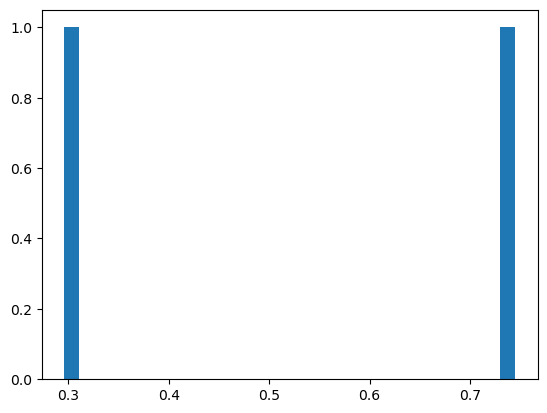

In [23]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

my_date = date.today() - timedelta(days=1) 

return_articles = get_articles_sentiments(keywrd= 'Hyundai' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)


In [24]:
return_articles["Date"] = my_date

In [25]:
return_articles.head()

,Sentiment,URL,Title,Description,Date
0,0.296,https://economictimes.indiatimes.com/markets/ipos/fpos/with-drhp-hyundai-steers-towards-3-billion-public-listing/articleshow/111031692.cms,"With DRHP, Hyundai steers towards $3 billion public listing","India's largest public issue will be an offer-for-sale (OFS) of up to 142.2 million shares, or a 17.5% stake, by South Korean parent Hyundai Motor Co.",2024-06-16
1,0.745,https://economictimes.indiatimes.com/industry/auto/auto-news/boost-for-hyundai-motor-export-plans-as-auto-co-plans-to-launch-slew-of-evs-over-next-4-years/articleshow/111026895.cms,"Boost for Hyundai Motor export plans, as auto co plans to launch slew of EVs over next 4 years","Hyundai Motor India Ltd (HMIL) is planning a ₹25,000 crore IPO to drive its parent company's strategy of making India a key export hub. The company plans to introduce nearly half a dozen electric vehicles for local sales and exports as part of this ambitious …",2024-06-16


In [26]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
0,0.296,https://economictimes.indiatimes.com/markets/ipos/fpos/with-drhp-hyundai-steers-towards-3-billion-public-listing/articleshow/111031692.cms,"India's largest public issue will be an offer-for-sale (OFS) of up to 142.2 million shares, or a 17.5% stake, by South Korean parent Hyundai Motor Co.","With DRHP, Hyundai steers towards $3 billion public listing"
1,0.745,https://economictimes.indiatimes.com/industry/auto/auto-news/boost-for-hyundai-motor-export-plans-as-auto-co-plans-to-launch-slew-of-evs-over-next-4-years/articleshow/111026895.cms,"Hyundai Motor India Ltd (HMIL) is planning a ₹25,000 crore IPO to drive its parent company's strategy of making India a key export hub. The company plans to introduce nearly half a dozen electric vehicles for local sales and exports as part of this ambitious …","Boost for Hyundai Motor export plans, as auto co plans to launch slew of EVs over next 4 years"


In [27]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
1,0.745,https://economictimes.indiatimes.com/industry/auto/auto-news/boost-for-hyundai-motor-export-plans-as-auto-co-plans-to-launch-slew-of-evs-over-next-4-years/articleshow/111026895.cms,"Hyundai Motor India Ltd (HMIL) is planning a ₹25,000 crore IPO to drive its parent company's strategy of making India a key export hub. The company plans to introduce nearly half a dozen electric vehicles for local sales and exports as part of this ambitious …","Boost for Hyundai Motor export plans, as auto co plans to launch slew of EVs over next 4 years"
0,0.296,https://economictimes.indiatimes.com/markets/ipos/fpos/with-drhp-hyundai-steers-towards-3-billion-public-listing/articleshow/111031692.cms,"India's largest public issue will be an offer-for-sale (OFS) of up to 142.2 million shares, or a 17.5% stake, by South Korean parent Hyundai Motor Co.","With DRHP, Hyundai steers towards $3 billion public listing"


In [29]:
return_articles.to_csv("Sentiment_Details"+my_date.isoformat()+".csv")